# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [32]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            


In [33]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
#syn0 = 2*np.random.random((3,1)) - 1
# define syn1
y = np.array([[0,0,1,1]]).T
iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
iter = 0

syn0_history = [syn0]


# initialize weights randomly with mean 0
syn1 = 2*np.random.random((4,1)) - 1
iter = 0

syn1_history = [syn1]

print(syn0)

print(syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [34]:
for iter in range(10000):
    # forward propagation
    l0 = X
    #print(l0)
    #print(syn0)
    l1 = nonlin(np.dot(l0,syn0))
    #print(l1)
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    
    l1_error = y - l1
    l2_error = y - l2
    
    if (iter% 5000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    #l1_delta = l1_error * nonlin(l1,True)
    l2_delta = l2_error*nonlin(l2,deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    if (iter% 2000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    # update weights
    #syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights
    #syn1 += np.dot(l1.T,l2_delta)
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.4685343254580603
L1_Error:0.4685343254580603
L1_Error:0.012098118827883315
L1_Error:0.008227317734746432
L2_Error:0.0072807336531105415
L1_Error:0.006592407764373811
L1_Error:0.005641272019557659


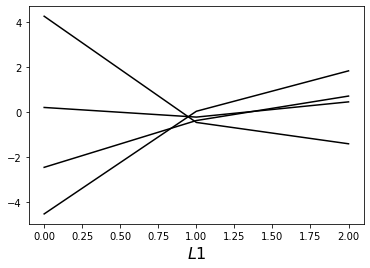

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

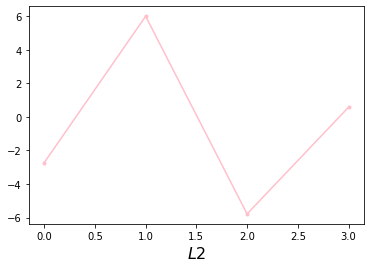

In [36]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [37]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[0.66946766 0.19647594 0.86093789 0.61025898]
 [0.58109006 0.13345707 0.8647569  0.55535307]
 [0.14847892 0.94448417 0.06339329 0.65683891]
 [0.10668013 0.91464415 0.06533669 0.60423949]]


In [38]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.00510229]
 [0.00421887]
 [0.99493875]
 [0.99437164]]
